# Stock Sentiment Headline Analysis Project

Goal: To analyze stocks from a dataset by comparing the sentiments of their headlines by using Natural Language Processing (NLP)

Users will also be able to input a stock, and the program will output the sentiment of the stocks headline, along with a few other stats and comparision points for the user to advise their decisions as to whether they wish to purchase the stock

## 1. Library Imports

In [56]:
import pandas as pd
import nltk
from nltk.probability import FreqDist
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Data Loading and Understanding

In [57]:
stocks = pd.read_csv("data/nasdaq.csv", on_bad_lines='skip')

In [58]:
stocks.head(10)

,Label,Ticker,Headline
0,0,A,@TotesTravel : Airline shares tumble as New Yo...
1,1,A,@TotesTravel : American United call off Hong K...
2,0,A,@TotesTravel : U.S. airline stocks hit highest...
3,1,A,@TotesTravel : American Airlines reaches deal ...
4,1,A,@TotesTravel : US airlines Treasury Department...
5,0,AAPL,Apple Inc and its main contract manufacturing ...
6,0,AAPL,European Union regulators who slapped Apple In...
7,1,AAPL,The EU's ruling that Apple Inc must pay a huge...
8,0,AAPL,Russia wants Apple SAP to cooperate against fo...
9,1,AAPL,U.S. Companies Are Stashing $2.1 Trillion Over...


In [60]:
stocks.info()
len(stocks["Ticker"].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13181 entries, 0 to 13180
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Label     13181 non-null  int64 
 1   Ticker    13181 non-null  object
 2   Headline  13181 non-null  object
dtypes: int64(1), object(2)
memory usage: 309.1+ KB


546

## 3. Sentiment Analysis

In [61]:
# Sentiment Analysis
sia = SentimentIntensityAnalyzer()

# Return the sentiment score of each headline
def get_polarity_scores(headline):
    scores = sia.polarity_scores(headline)
    # Get returned in a dictionary
    return scores["neg"], scores["pos"], scores["neu"], scores["compound"]
    

# Apply polarity scoring function and save scores into separate columns
stocks[['Negative', 'Positive', 'Neutral', 'Compound']] = stocks['Headline'].apply(lambda x: pd.Series(get_polarity_scores(x)))


In [62]:
stocks.head(20)

,Label,Ticker,Headline,Negative,Positive,Neutral,Compound
0,0,A,@TotesTravel : Airline shares tumble as New Yo...,0.038,0.060,0.902,0.2023
1,1,A,@TotesTravel : American United call off Hong K...,0.000,0.078,0.922,0.4215
2,0,A,@TotesTravel : U.S. airline stocks hit highest...,0.000,0.074,0.926,0.4215
3,1,A,@TotesTravel : American Airlines reaches deal ...,0.000,0.086,0.914,0.3400
4,1,A,@TotesTravel : US airlines Treasury Department...,0.000,0.169,0.831,0.6249
5,0,AAPL,Apple Inc and its main contract manufacturing ...,0.083,0.083,0.833,-0.2500
6,0,AAPL,European Union regulators who slapped Apple In...,0.000,0.000,1.000,0.0000
7,1,AAPL,The EU's ruling that Apple Inc must pay a huge...,0.032,0.181,0.787,0.7506
8,0,AAPL,Russia wants Apple SAP to cooperate against fo...,0.000,0.126,0.874,0.6705
9,1,AAPL,U.S. Companies Are Stashing $2.1 Trillion Over...,0.052,0.069,0.879,0.1779


## 4. Data Cleaning

In [63]:
stocks.isna()

,Label,Ticker,Headline,Negative,Positive,Neutral,Compound
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
13176,False,False,False,False,False,False,False
13177,False,False,False,False,False,False,False
13178,False,False,False,False,False,False,False
13179,False,False,False,False,False,False,False


In [64]:
stocks.loc[stocks.isna().any(axis=1)]

,Label,Ticker,Headline,Negative,Positive,Neutral,Compound


In [65]:
stocks.dropna()

,Label,Ticker,Headline,Negative,Positive,Neutral,Compound
0,0,A,@TotesTravel : Airline shares tumble as New Yo...,0.038,0.060,0.902,0.2023
1,1,A,@TotesTravel : American United call off Hong K...,0.000,0.078,0.922,0.4215
2,0,A,@TotesTravel : U.S. airline stocks hit highest...,0.000,0.074,0.926,0.4215
3,1,A,@TotesTravel : American Airlines reaches deal ...,0.000,0.086,0.914,0.3400
4,1,A,@TotesTravel : US airlines Treasury Department...,0.000,0.169,0.831,0.6249
...,...,...,...,...,...,...,...
13176,1,ZNGA,Bitcoin Tops $1000 Again as Zynga Accepts Virt...,0.000,0.444,0.556,0.6808
13177,1,ZNGA,Zynga Accepts Bitcoin For Microtransactions,0.000,0.365,0.635,0.3182
13178,1,ZUMZ,Zumiez (ZUMZ) unusual put activity into earnin...,0.000,0.000,1.000,0.0000
13179,1,ZUMZ,Zumiez Is Going Bankrupt,0.545,0.000,0.455,-0.5574


In [66]:
# If the negative, positive, neutral, and compound are all 0, then we will cut out the row for that stock
def map_stock(neg, pos, comp):
    print(neg, pos, comp)
    if (int)(neg*100) == 0 and (int)(pos*100) == 0 and (int)(comp*100) == 0:
        return None
    return comp

# Map the values for the compound
stocks["Compound"] = stocks.apply(lambda row: map_stock(row["Negative"], row["Positive"], row["Compound"]), axis=1)

stocks.dropna()


0.038 0.06 0.2023
0.0 0.078 0.4215
0.0 0.074 0.4215
0.0 0.086 0.34
0.0 0.169 0.6249
0.083 0.083 -0.25
0.0 0.0 0.0
0.032 0.181 0.7506
0.0 0.126 0.6705
0.052 0.069 0.1779
0.158 0.092 -0.4767
0.0 0.0 0.0
0.053 0.0 -0.128
0.0 0.069 0.4215
0.262 0.0 -0.8957
0.0 0.0 0.0
0.0 0.069 0.4215
0.0 0.0 0.0
0.12 0.072 -0.1779
0.318 0.0 -0.7184
0.072 0.15 0.5859
0.0 0.073 0.4404
0.236 0.0 -0.8625
0.077 0.124 0.1531
0.06 0.0 -0.1027
0.22 0.0 -0.4767
0.153 0.0 -0.6808
0.0 0.255 0.8519
0.247 0.0 -0.3182
0.044 0.133 0.5936
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.399 0.743
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.115 0.6224
0.0 0.345 0.577
0.03 0.055 0.296
0.247 0.0 -0.3182
0.126 0.0 -0.6682
0.0 0.17 0.5697
0.31 0.0 -0.5574
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.264 0.4995
0.366 0.0 -0.6369
0.0 0.098 0.3612
0.167 0.0 -0.296
0.128 0.0 -0.296
0.0 0.0 0.0
0.0 0.0 0.0
0.048 0.0 -0.1027
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0
0.063 0.078 -0.0516
0.15 0.0 -0.3182
0.0 0.0 0.0
0.0 0.074 0.34
0.0 0.127 0.4939
0.0 0.0 0.0
0.3

,Label,Ticker,Headline,Negative,Positive,Neutral,Compound
0,0,A,@TotesTravel : Airline shares tumble as New Yo...,0.038,0.060,0.902,0.2023
1,1,A,@TotesTravel : American United call off Hong K...,0.000,0.078,0.922,0.4215
2,0,A,@TotesTravel : U.S. airline stocks hit highest...,0.000,0.074,0.926,0.4215
3,1,A,@TotesTravel : American Airlines reaches deal ...,0.000,0.086,0.914,0.3400
4,1,A,@TotesTravel : US airlines Treasury Department...,0.000,0.169,0.831,0.6249
...,...,...,...,...,...,...,...
13175,1,ZNGA,Zynga sues sex app maker over Bang With Friend...,0.000,0.256,0.744,0.4767
13176,1,ZNGA,Bitcoin Tops $1000 Again as Zynga Accepts Virt...,0.000,0.444,0.556,0.6808
13177,1,ZNGA,Zynga Accepts Bitcoin For Microtransactions,0.000,0.365,0.635,0.3182
13179,1,ZUMZ,Zumiez Is Going Bankrupt,0.545,0.000,0.455,-0.5574


## 5. Data Testing/Experimenting

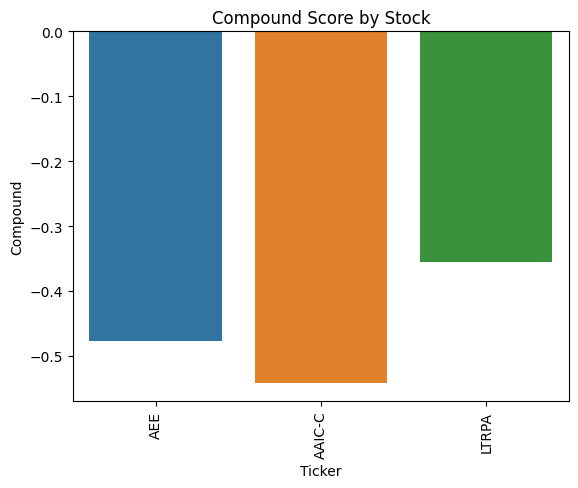

In [69]:
# Graph the first 5 stocks and their compounded sentiments
ax = sns.barplot(data=stocks.sample(3), x='Ticker', y='Compound', hue='Ticker')
ax.set_title('Compound Score by Stock')
plt.xticks(rotation='vertical')
plt.show()

## 6. User-Inputted Stock Data Exploration

In [70]:
# Check to see if the stock is present in the code and then prompt again
chosen_stock = input("Pick a stock to evaluate. Enter in ticker format (Apple = AAPL)")


#while chosen_stock not in stocks["Ticker"]:
    #chosen_stock = input("Pick a stock to evaluate. Enter in ticker format (Apple = AAPL)")


In [71]:
print(chosen_stock)

AAPL


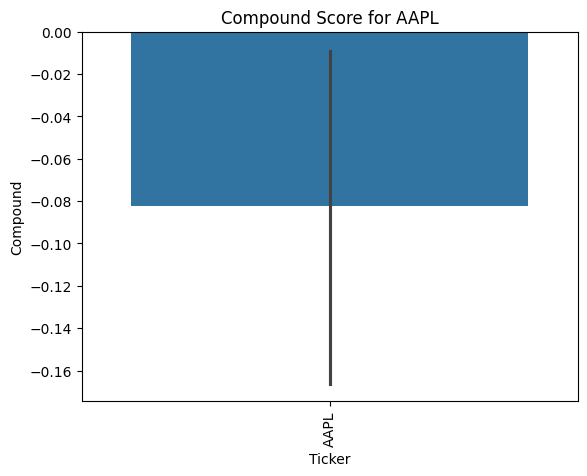

In [72]:
# Return the chosen stock's compound chart
# Data is all of the columns for that stock
# NEED HELP
ax = sns.barplot(data=stocks.loc[stocks["Ticker"] == chosen_stock], x='Ticker', y='Compound', hue='Ticker')
ax.set_title('Compound Score for ' + chosen_stock)
plt.xticks(rotation='vertical')
plt.show()

In [83]:
# Calculate average compound sentiment score for the chosen stock
averages = stocks.groupby("Ticker")[["Compound"]].mean()
average_compound = averages.loc[chosen_stock]["Compound"]


In [87]:
# Return the sentiment analysis information for the chosen stock
# Positive, negative, neutral, and compound sentiments
print("The average sentiment for the headlines for " + str(chosen_stock) + " is " + str(average_compound))
if average_compound < 0:
    print("Because the average sentiment is less than 0, there has tended to be negative coverage of the selected stock")
else:
    print("Because the average sentiment is greater than 0, there has tended to be positive coverage of the selected stock")


The average sentiment for the headlines for AAPL is -0.08241532846715328
Because the average sentiment is less than 0, there has tended to be negative coverage of the selected stock


# Below are the extra goals

In [ ]:
prices = pd.read_csv("data/stock prices.csv", on_bad_lines='skip')

In [ ]:
prices.head(10)

In [ ]:
if chosen_stock not in prices["symbol"]:
    print("I cannot offer data on the history of this stock, as I do not have its price history")